In [7]:
#!git clone https://github.com/lucas-noblat/GerOndApp.git

#import sys

#sys.path.append('/content/GerOndApp/APP')


import functions as fc
import scipy.signal


In [8]:
#sig = fc.gerar_sinal('a', 1, 3, 1, 0)

## Gerando sinais

- **Senoidal**

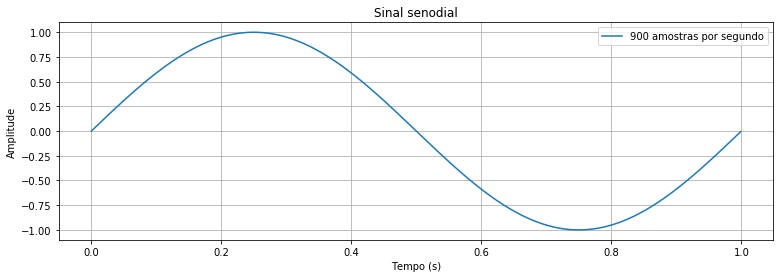

In [9]:
# Número de amostras por segundo

t_amostragem = 900

# Criando sinal

vetor_tempo, s_senoidal = fc.sinal_senoidal(amplitude=1, frequencia=1, taxa_amostragem= t_amostragem)

# Plottando

fc.plotar(vetor_tempo, s_senoidal, nome='Sinal senodial', largura=1280, altura=400, legenda=f'{t_amostragem} amostras por segundo')

#fc.plt.stem(vetor_tempo, s_senoidal, linefmt='-', markerfmt='ro', basefmt='-k')


In [10]:
series_ativas = [seno, quad, ruidoBranco]
operacoes = ['+','+']

resultante = fc.aplicar_operacoes(series_ativas, operacoes)
fc.plotar(resultante, t, 'Série Resultante')
fc.plotar(seno, t, "Seno")

NameError: name 'seno' is not defined